# Scipy

## Table of contents

- [References](#References)
- [Functions are building blocks](#Functions-are-building-blocks)
- [Best practices](#Best-practices)
- [Anatomy of a function](#Anatomy-of-a-function)
    - [Signature](#Signature)
        - [Type hints](#Type-hints)
    - [Body](#Body)
    - [Docstrings](#Docstrings)
- [Parameters and arguments](#Parameters-and-arguments)
    - [Parameters](#Parameters)
    - [Arguments](#Arguments)
    - [Positional arguments](#Positional-arguments)
    - [Keyword arguments](#Keyword-arguments)
    - [Default values](#Default-values)
- [How Python executes a function](#How-Python-executes-a-function)
- [The scope of a function](#The-scope-of-a-function)
- [`*args` and `**kwargs`](#*args-and-**kwargs)
- [Exercises](#Exercises)
    - [Quiz on functions](#Quiz-on-functions)
    - [Longest consecutive sequence 🌶️🌶️](#Longest-consecutive-sequence-🌶️🌶️)
      - [Part 2 🌶️🌶️🌶️](#Part-2-🌶️🌶️🌶️)
    - [Password validator](#Password-validator)
      - [Part 1 🌶️](#Part-1-🌶️)
      - [Part 2 🌶️🌶️](#Part-2-🌶️🌶️)
    - [Buckets reorganization](#Buckets-reorganization)
      - [Part 1 🌶️](#Part-1-🌶️)
      - [Part 2 🌶️🌶️](#Part-2-🌶️🌶️)


## References

Additional material for learning scipy, from the documentation, articles, videos or examples:
- The scipy [user guide](https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide)
- A good wikipedia article on [optimization](https://en.wikipedia.org/wiki/Mathematical_optimization)


---

## Introduction: scipy is a mixed bag

Scipy is a python module that provides implementation of many algorithms commonly used in scientific computing. These covers many topics, including:

- Optimization
- Numerical integration
- Linear algebra
- Fourier transforms
- Spatial data processing
- Sparse matrices

And many more. 
Because of the wide variety of algorithms, we will structure this chapter as a series of use cases where the use of scipy would make it easier to solve the problem at hand.
If you want to discover more algorithms offered by scipy, please check the [documentation](https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide).


## Pre-requisites

Most of the algorithms in scipy operate on (multidimensional) arrays of numerical values. 
For technical reasons, these arrays aren't implemented with the built-in python list datatype but using [**numpy arrays**](https://numpy.org/doc/stable/user/absolute_beginners.html). 

These objects offer better memory and computation performance when operating on large arrays as compared to python lists. 
If you want to understand this chapter in-depth and be able to solve the exercises, we advice you first read the chapter on numpy here.



## 1. Use case: optimization

A common problem in the analysis of scientific data is **optimization**.  
In this context, we mean a restricted definition, where given a function and a set of data we want to determine the value of one or more parameters in order to minimize the distance between the function and the data.

### Minimizing the value of a function
Let's see an example to understand what we mean: given a quadratic function `f(x)`, we want to determine the value of `x` that minimizes its value.
We start by defining our function `f`:

In [3]:
def f(x):
    """
    This is the function we want to minimise
    """
    return x**2 + 4*x + 4 


Now we plot the function using `matplotlib`, a module for plotting described in another module of our course.

Text(0.5, 1.0, 'Quadratic Function')

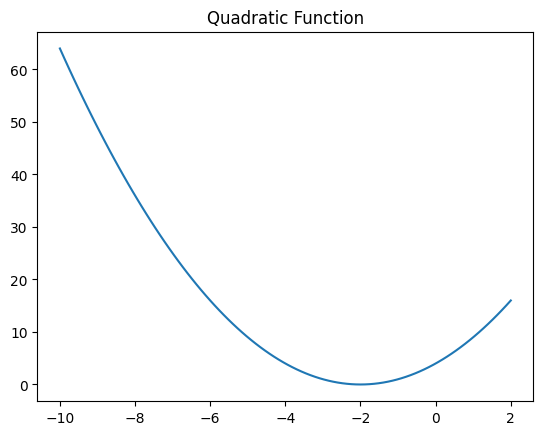

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# Generate x values for plotting
x_values = np.linspace(-10, 2, 100)

# Plot the quadratic function
plt.plot(x_values, f(x_values), label='Quadratic Function')
plt.title('Quadratic Function')

Visually (and algebraically) we can determine the minimum of this function to be at -2. 

We now want to determine the minimum of this function **numerically** using the algorithms offered by scipy. 
Naturally, we would not do this for a quadratic functions, where we can determine the derivatives in a closed form and hence find the exact value of the minimum.
However, the quadratic function is just an example, in reality we would often encounter functions that are too complex to handle algebraically or where the derivate does not exist in a closed form. 
In those cases, we can only determine minima (or solve other optimization problems) using numerical approximation with algorithms like the one scipy offers.

Fortunately, scipy offers the `minimize` [function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html), which can directly estimate the minimum of a function of one argument.
The function takes the function to minimize as a first argument and an initial guess of the minimum as a second argument.

The choice of the initial guess is very important for the success of the minimization: if the function is not **convex**, a wrong choice of initial value will not lead to the true minimum but will result in the algorithm being stuck in a local minimum. 
It is not the purpose of this course to discuss these topics in-detail, if you need more information please consult a book on numerical methods or on optimization.



In [8]:
from scipy.optimize import minimize
initial_guess = 0  # Initial guess for the minimum
result = minimize(f, initial_guess)
print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.0
        x: [-2.000e+00]
      nit: 2
      jac: [ 0.000e+00]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3


As you can see from the output, running `minimze` results in an object with several attributes. 
Of interest for us are primarily the following:

- `success` is a boolean flag which is `True` if the algorithm could find a (local) minimum
- `fun` is the value of the function at the location of the estimated minimum
- `x` is the estimated value of `x` that minimizes the function.

In this case, the algorithm correctly found the minimum of `f` at -2.

### Curve fitting
A closely related problem is **curve fitting**; here given a vector of locations $\mathbf{x} =  \begin{bmatrix} f(x_1) & f(x_2) & \ldots & f(x_n) \end{bmatrix}$, a vector of  observations $\mathbf{y}$ and a function $f(x, \mathbf{k})$ of a location and a set of parameters $\mathbf{k}$  we look for the values of $\mathbf{k}$ that minimize (usually the Euclidian) distance between the points of the function $f$ evaluated at the locations $\mathbf{x}$: $f(\mathbf{x}, \mathbf{k}) = \mathbf{\hat{y}}  = \begin{bmatrix} f(x_1) & f(x_2) & \ldots & f(x_n) \end{bmatrix}$ and the vector of observations $\mathbf{y}$:

$\underset{\mathbf{k}}{\text{min}} \, \| f(\mathbf{x}, \mathbf{k}) - \mathbf{y} \|_2^2$

This means that we look for a set of parameters $\mathbf{k}$ so that the squared differences between the observed values and the values *simulated* by the function are minimized. 
Curve fitting is useful for example when you have a set of experimental data and you want to use them to determine parameters of a physical model you designed your experiment for.


#### 1. Example: determining the gravity acceleration
Suppose for example we want to determine the gravitational acceleration $g$ with an experiment.
To do so, we time the fall of an object from an height $h$ until it touches the ground.  This results in a measurement $t_f$ (the total fall time). In order to obtain enough data, we repeat the experiment for a set of heights $h$.

This defines the following relationship:

$h(t, g) = 1/2 * g t^2$

Because we measure $t$ and vary $h$, we express the problem as:

$t(h, g) = \sqrt{2 h / g}$

Since we can't perform the experiment ourselves, let's first define a function `simulate_fall` to generate the fall time as a function of $h$:


In [52]:
from numpy.typing import ArrayLike
from numpy.random import randn
def simulate_fall(h: ArrayLike) -> ArrayLike:
    """
    Simulate the fall of an object from a height h
    """
    g = 9.81  # Acceleration due to gravity
    return np.sqrt(2 * h / g) + 1e-4 * randn(len(h))




Notice that we add a random number sampled from a Gaussian distribution with zero mean and standard deviation of 1e-4 seconds to the simulated values. 
We do this to make the measurement more realistic by simulating the effect of measurement noise and imprecisions.
Now we generate 20 fall experiments with heights equally spaced between 0 and 1 m and plot the graph of times against the starting height.


Text(0, 0.5, 'Fall time (s)')

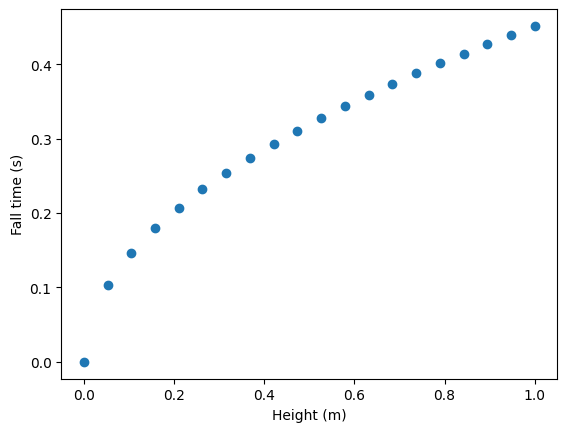

In [54]:
heights = np.linspace(0, 1, 20)
fall_times = simulate_fall(heights)


# Plot the fall times against the heights
f, ax = plt.subplots()
ax.scatter(heights, fall_times)
ax.set_xlabel('Height (m)')
ax.set_ylabel('Fall time (s)')

At this point we have all the data we need for estimating $g$ from our measurements. 
In this case, the array `fall_times` plays the role of $\mathbf{y}$ and the array `heights` corresponds to $\mathbf{x}$.
We can use the function [`scipy.optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit) to solve these types of problems.
The function  takes the following arguments:

- `f`, the function to fit. Its first argument must be `x`, the other arguments correspond to the curve parameters in order of listing
- `xdata` corresponds to the vector $x$
- `ydata` corresponds to the vector $y$


Following this, let's define our function to fit, `f`

In [65]:
def f(h: ArrayLike, g: float) -> ArrayLike:
    return np.sqrt(2 * h / g)



Now we can call the function:


In [60]:
from scipy.optimize import curve_fit

# Fit the function to the data
g_est, pcov = curve_fit(f, heights, fall_times)
print(g_est)


[9.80982541]


Success! As you can see, the estimated value of $g$ is quite close to the real value. The discrepancy is in the order of magnitude of the standard deviation of the noise we add to the simulated measurements.

We can now plot the fitted curve and superimpose it to the "measurements":

Text(0, 0.5, 'Fall time (s)')

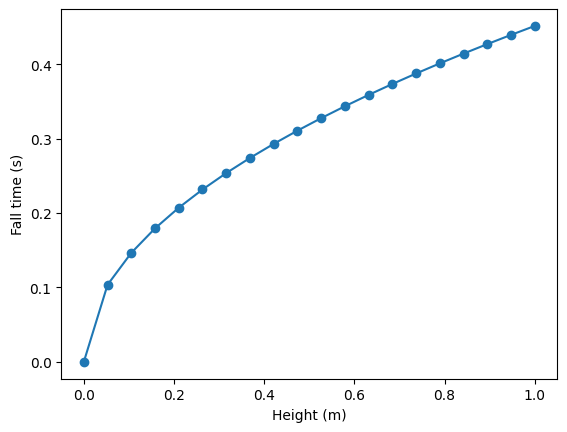

In [66]:
# Plot the fall times against the heights
estimated_fall_times = f(heights, g_est[0])
fig, ax = plt.subplots()
ax.scatter(heights, fall_times)
ax.plot(heights, estimated_fall_times, label='Estimated fall times')
ax.set_xlabel('Height (m)')
ax.set_ylabel('Fall time (s)')

You can see that the curve with the estimated fall times given the estimated $g$ tracks the "measurements" very well.
With this example, we conclude the first use case.

## 2. Use case: spatial data

## 3. Use case: linear algebra 

## 4. Use case: interpolation

## 5. Use case: sparse matrices

<div class="alert alert-block alert-info">
    <h4><b>Hint</b></h4> Your solution function takes **only one argument**: a file containing your buckets list. The buckets list is a multi-line string as in the example above. Each line is a single bucket, so you need to split the string on every new line (`\n`)
</div>

In [ ]:
%%ipytest

def solution_buckets1(buckets_file: pathlib.Path) -> int:
    buckets = buckets_file.read_text()  # do NOT remove this line
    # Write your solution here or below this line
    pass

### Part 2 🌶️🌶️

You are told that you should not care about the priority of **every item**, but only of a "special item" that is common to groups of **three buckets**.

Every set of three lines correspond to a single group, and each group can have a different special item – that is, an item with a different letter.

Considering once again the above example, in the first three lines:

```
vJrwpWtwJgWrhcsFMMfFFhFp
jqHRNqRjqzjGDLGLrsFMfFZSrLrFZsSL
PmmdzqPrVvPwwTWBwg
```
The only item that appears in **all** three buckets is `r` (priority 18). This must be the "special item".

If you consider the second group of three, the special item is of type `Z` (priority 52). The sum is `18 + 52 = 70`.

<div class="alert alert-block alert-warning">
    <h4><b>Question</b></h4> What is the sum of the priorities of <b>all</b> the special items?
</div>


In [ ]:
%%ipytest

def solution_buckets2(buckets_file: pathlib.Path) -> int:
    buckets = buckets_file.read_text()  # do NOT remove this line
    # Write your solution below this comment
    pass